In [14]:
import yfinance as yf
from datetime import datetime, timedelta

def download_stock_data_modified(ticker, years_back):
    end_date = datetime(2023, 12, 31)
    start_date = end_date - timedelta(days=years_back * 365)

    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Descargar datos para Apple, Coca-Cola y Amazon
tickers = ['AAPL', 'KO', 'AMZN']  # Símbolos de las acciones de Apple, Coca-Cola y Amazon
years_back = 3

# Almacenar los datos descargados en un diccionario
historical_data_dict = {}
for ticker in tickers:
    historical_data_dict[ticker] = download_stock_data_modified(ticker, years_back)

# Mostrar los primeros datos de cada empresa como ejemplo
for ticker, data in historical_data_dict.items():
    print(f"Datos históricos para {ticker}:")
    print(data.head(), "\n")  # Mostrar las primeras filas de cada conjunto de datos


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
Datos históricos para AAPL:
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-12-31  134.080002  134.740005  131.720001  132.690002  130.387222   
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.164154   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.736374   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.402916   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.647934   

               Volume  
Date                   
2020-12-31   99116600  
2021-01-04  143301900  
2021-01-05   97664900  
2021-01-06  155088000  
2021-01-07  109578200   

Datos históricos para KO:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-12-31  54.450001  54.930000  5

In [15]:
# Eliminar la columna 'Adj Close' de cada DataFrame
for ticker in historical_data_dict:
    historical_data_dict[ticker].drop('Adj Close', axis=1, inplace=True)

# Opcional: Imprimir los primeros datos de cada DataFrame como verificación
for ticker, data in historical_data_dict.items():
    print(f"Primeros datos para {ticker} después de eliminar 'Adj Close':")
    print(data.head(), "\n")


Primeros datos para AAPL después de eliminar 'Adj Close':
                  Open        High         Low       Close     Volume
Date                                                                 
2020-12-31  134.080002  134.740005  131.720001  132.690002   99116600
2021-01-04  133.520004  133.610001  126.760002  129.410004  143301900
2021-01-05  128.889999  131.740005  128.429993  131.009995   97664900
2021-01-06  127.720001  131.050003  126.379997  126.599998  155088000
2021-01-07  128.360001  131.630005  127.860001  130.919998  109578200 

Primeros datos para KO después de eliminar 'Adj Close':
                 Open       High        Low      Close    Volume
Date                                                            
2020-12-31  54.450001  54.930000  54.270000  54.840000   8495000
2021-01-04  54.270000  54.630001  52.029999  52.759998  25611100
2021-01-05  52.330002  52.619999  52.029999  52.180000  20323800
2021-01-06  51.970001  52.020000  50.189999  50.520000  38724500
2021

In [16]:
# Imprimir el formato y los tipos de datos de cada DataFrame
for ticker, data in historical_data_dict.items():
    print(f"Formato y tipos de datos para {ticker}:")
    data.info()
    print("\n")


Formato y tipos de datos para AAPL:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-12-31 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    754 non-null    float64
 1   High    754 non-null    float64
 2   Low     754 non-null    float64
 3   Close   754 non-null    float64
 4   Volume  754 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB


Formato y tipos de datos para KO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-12-31 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    754 non-null    float64
 1   High    754 non-null    float64
 2   Low     754 non-null    float64
 3   Close   754 non-null    float64
 4   Volume  754 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB


Formato y tipos de datos para AMZN:
<class 'pandas.core.fram

In [17]:
# Verificar si hay valores nulos en cada conjunto de datos

for ticker, data in historical_data_dict.items():
    print(f"Verificando valores nulos en los datos de {ticker}:")
    print(data.isnull().sum(), "\n")  # Muestra la cantidad de valores nulos en cada columna para cada empresa



Verificando valores nulos en los datos de AAPL:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 

Verificando valores nulos en los datos de KO:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 

Verificando valores nulos en los datos de AMZN:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 



In [18]:
# Realizar un análisis descriptivo de cada conjunto de datos

for ticker, data in historical_data_dict.items():
    print(f"Análisis descriptivo para los datos de {ticker}:")
    print(data.describe(), "\n")  # Muestra el análisis descriptivo para cada empresa


Análisis descriptivo para los datos de AAPL:
             Open        High         Low       Close        Volume
count  754.000000  754.000000  754.000000  754.000000  7.540000e+02
mean   155.903077  157.632136  154.310583  156.051539  7.928526e+07
std     19.845293   19.827356   19.894210   19.876181  2.785235e+07
min    119.029999  120.400002  116.209999  116.360001  2.404830e+07
25%    141.607502  143.332504  139.382500  141.872501  5.855535e+07
50%    152.575005  154.570000  150.825005  152.805000  7.466715e+07
75%    172.290001  173.937496  170.965000  172.660004  9.262790e+07
max    198.020004  199.619995  197.000000  198.110001  1.954327e+08 

Análisis descriptivo para los datos de KO:
             Open        High         Low       Close        Volume
count  754.000000  754.000000  754.000000  754.000000  7.540000e+02
mean    58.547493   58.943037   58.116645   58.532838  1.519776e+07
std      4.102178    4.134432    4.058175    4.118147  6.704868e+06
min     48.270000   48.689

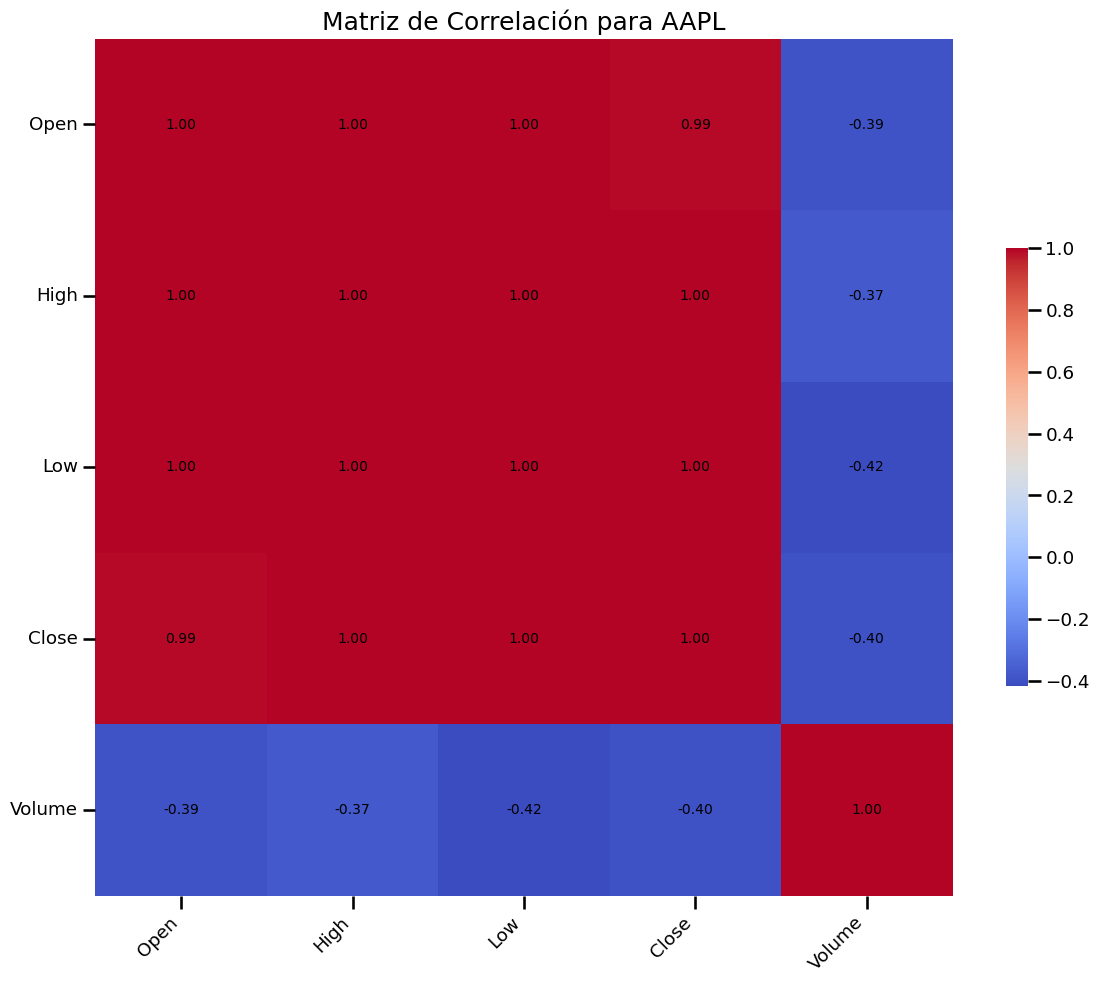

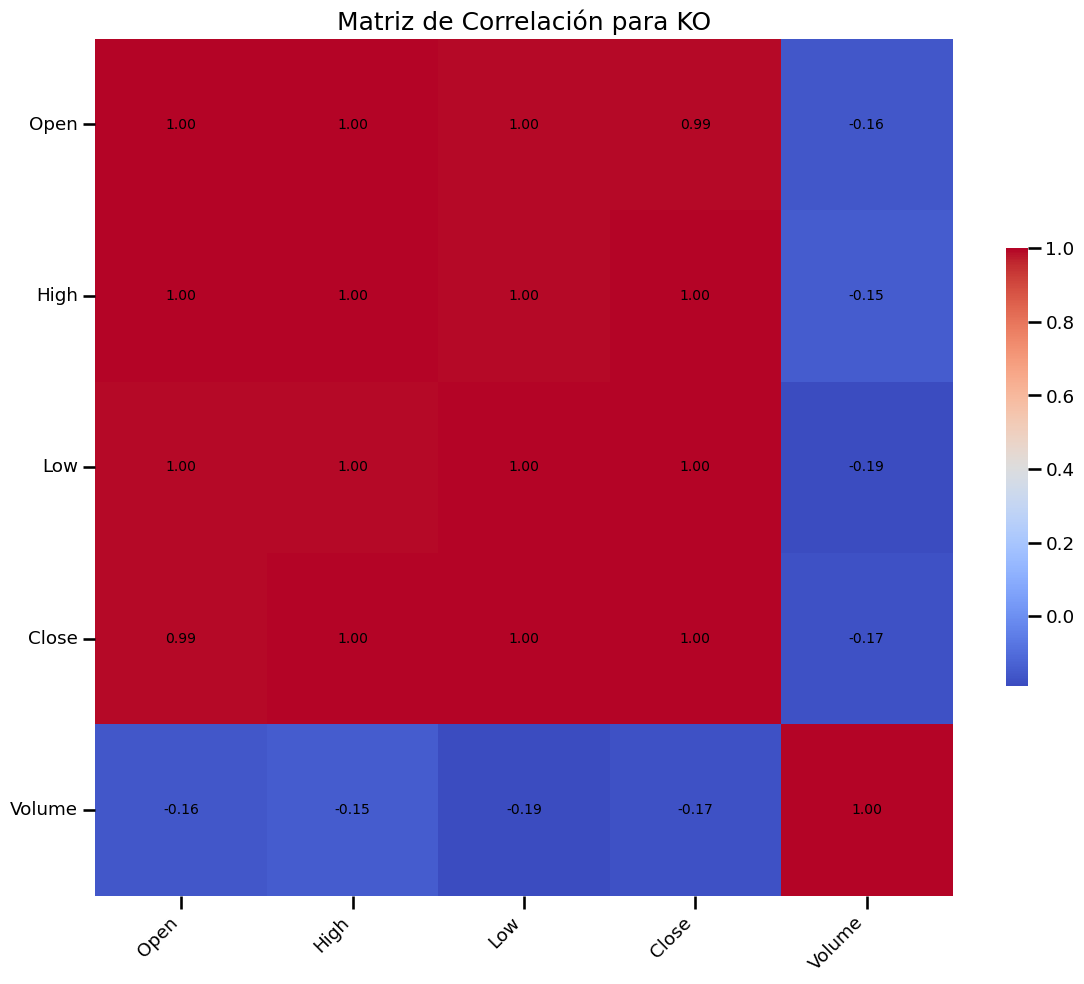

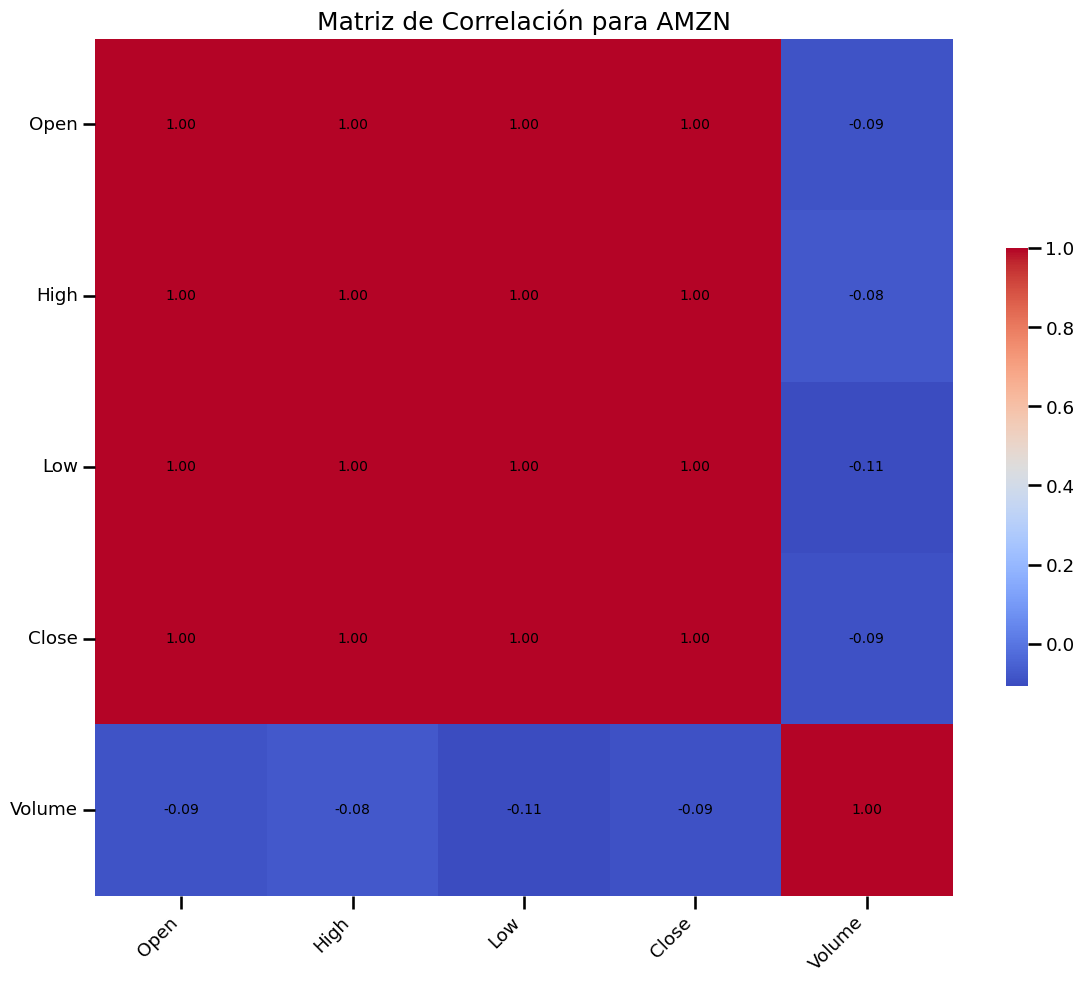

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el contexto para un tamaño de fuente adecuado
sns.set_context('talk', font_scale=0.8)

# Iterar sobre cada conjunto de datos y crear un mapa de calor para cada uno
for ticker, data in historical_data_dict.items():
    # Calcular la matriz de correlación
    correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

    # Crear el mapa de calor sin los valores numéricos
    plt.figure(figsize=(12, 10))
    ax = sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

    # Agregar los valores numéricos manualmente
    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            ax.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                    ha='center', va='center', fontsize=10, color='black')

    # Ajustar la visualización de las etiquetas y el título
    plt.title(f'Matriz de Correlación para {ticker}', size=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Ajustar la disposición para que todo encaje sin solaparse y sea claramente visible
    plt.tight_layout()
    plt.show()


c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


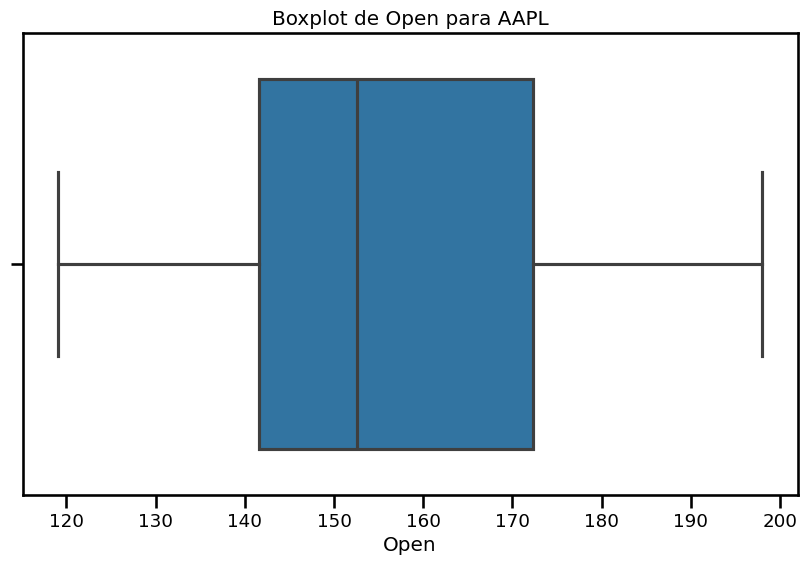

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


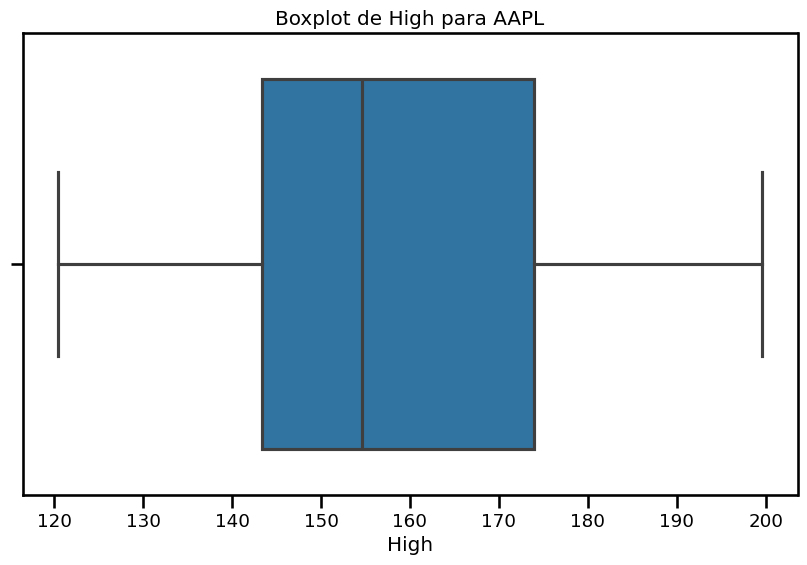

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


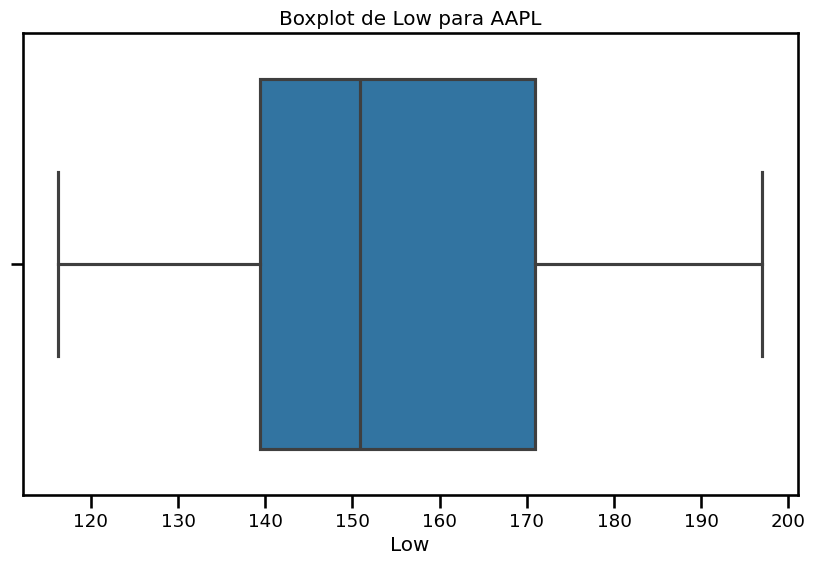

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


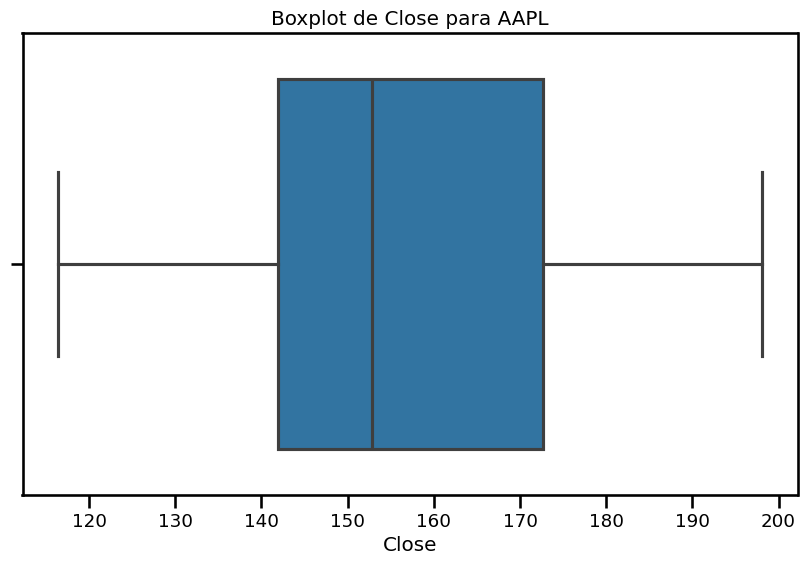

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


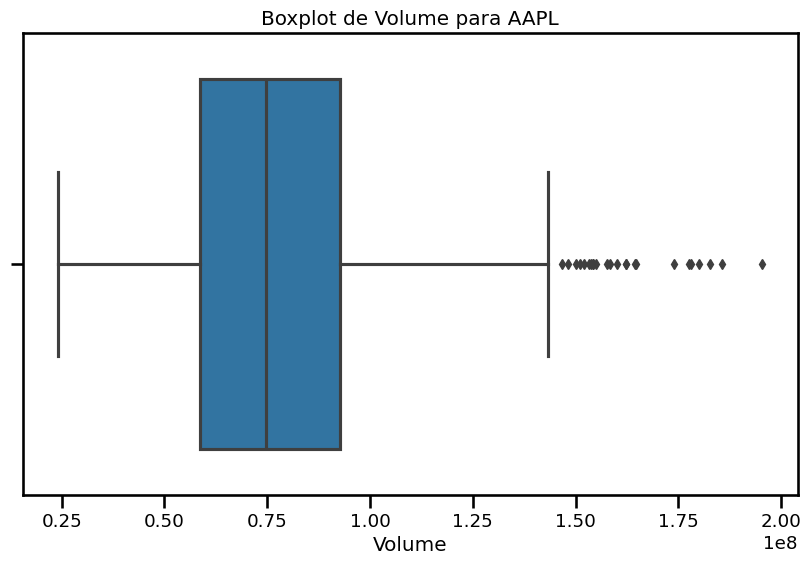

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


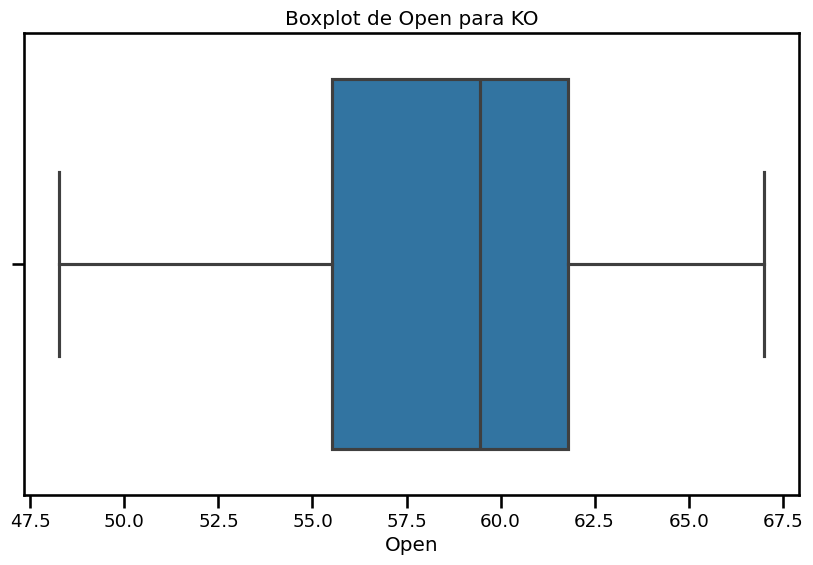

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


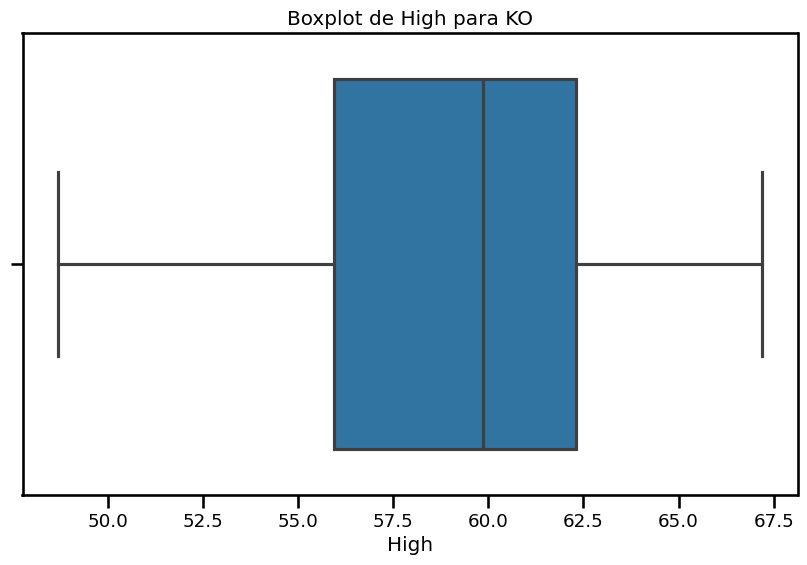

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


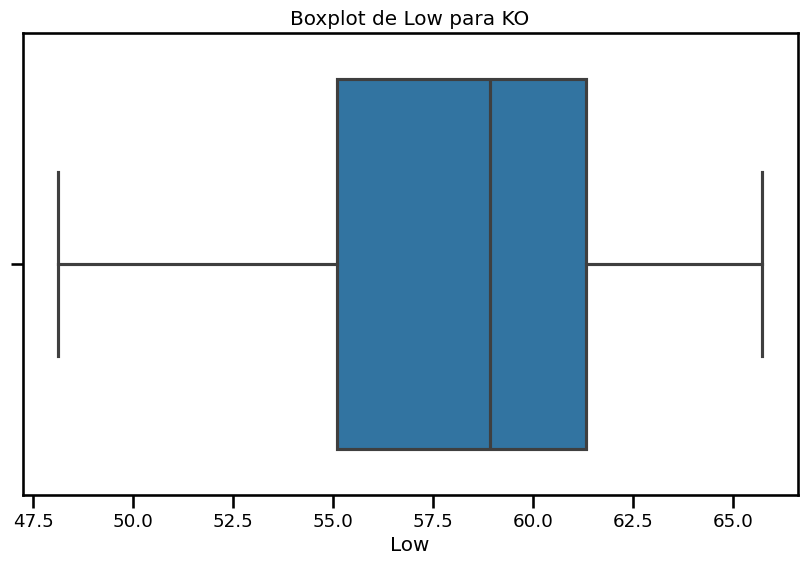

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


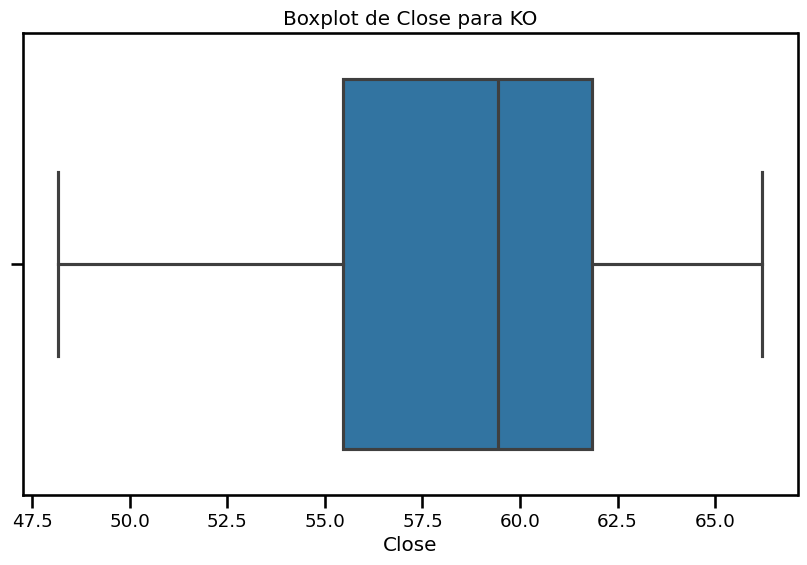

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


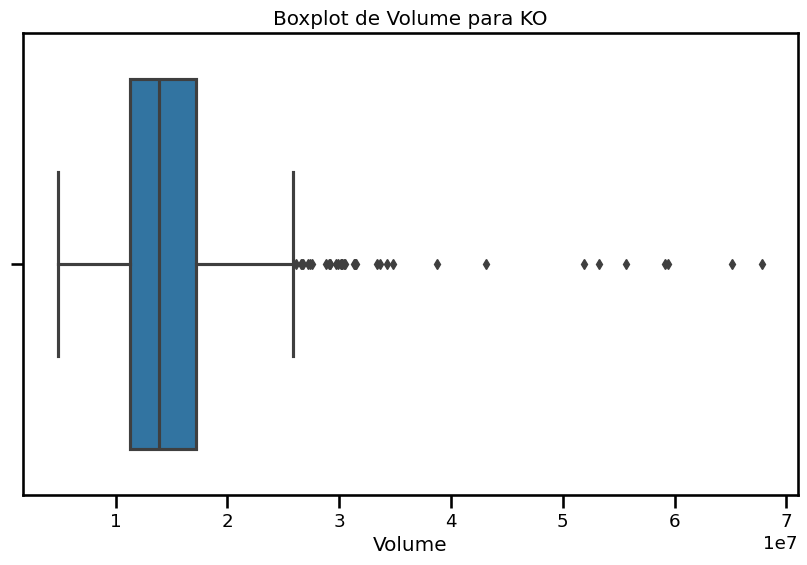

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


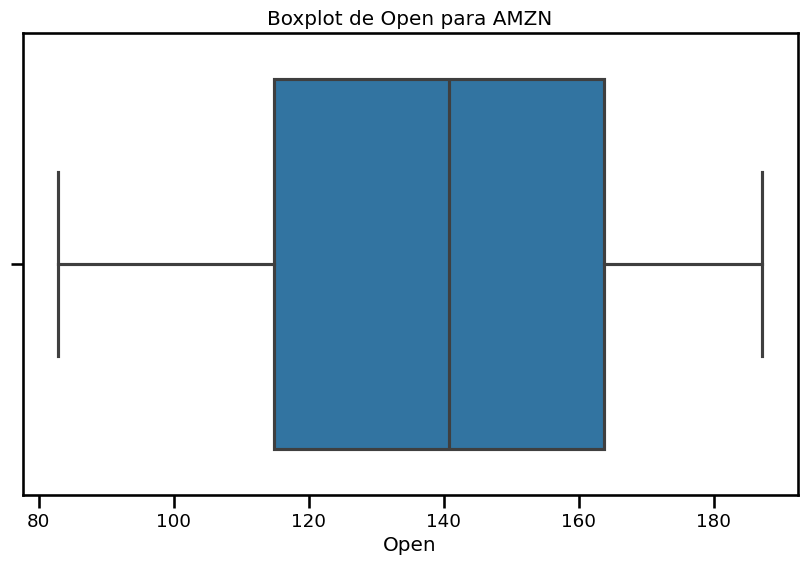

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


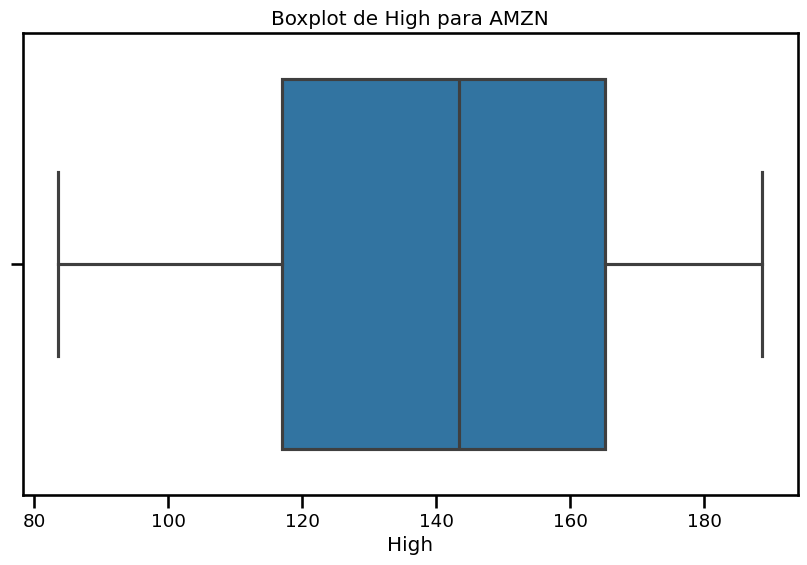

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


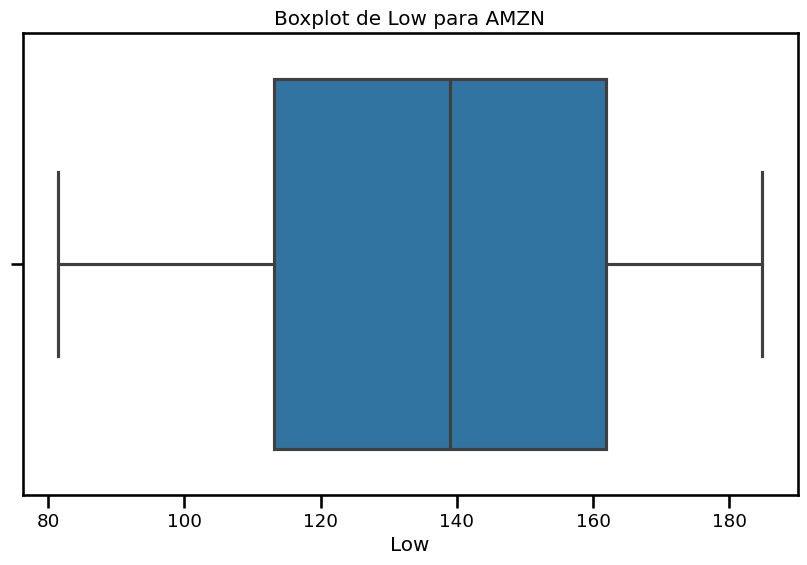

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


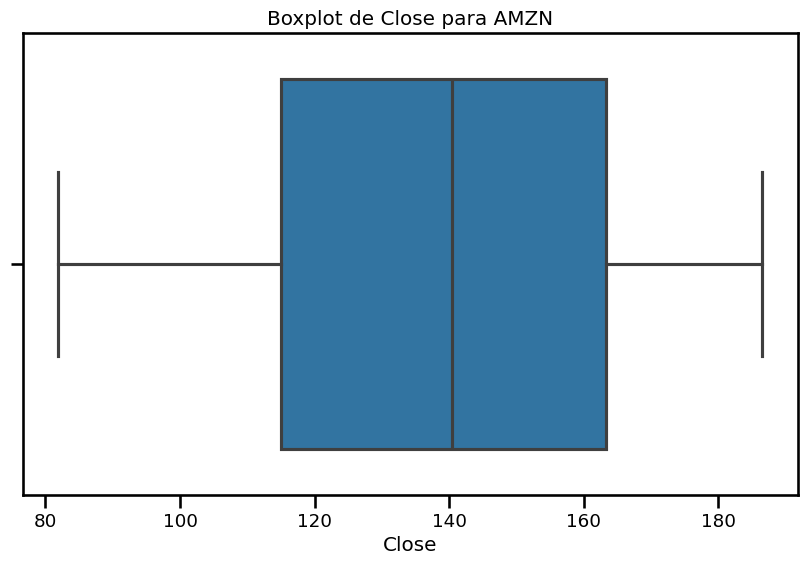

c:\Users\fjgar\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


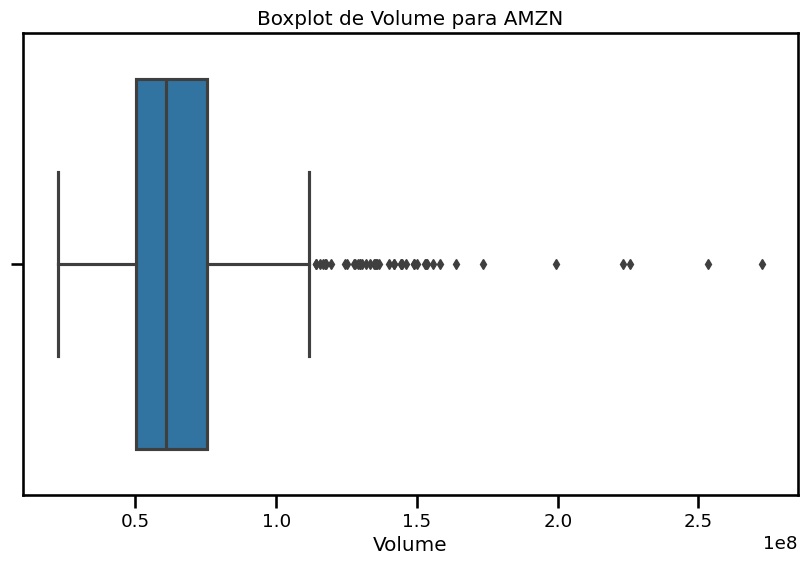

In [20]:
# Creando gráficos de cajas para detectar outliers
for ticker, data in historical_data_dict.items():
    # Gráfico de cajas para cada característica
    features = ['Open', 'High', 'Low', 'Close', 'Volume']
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=data, x=feature)
        plt.title(f'Boxplot de {feature} para {ticker}')
        plt.show()


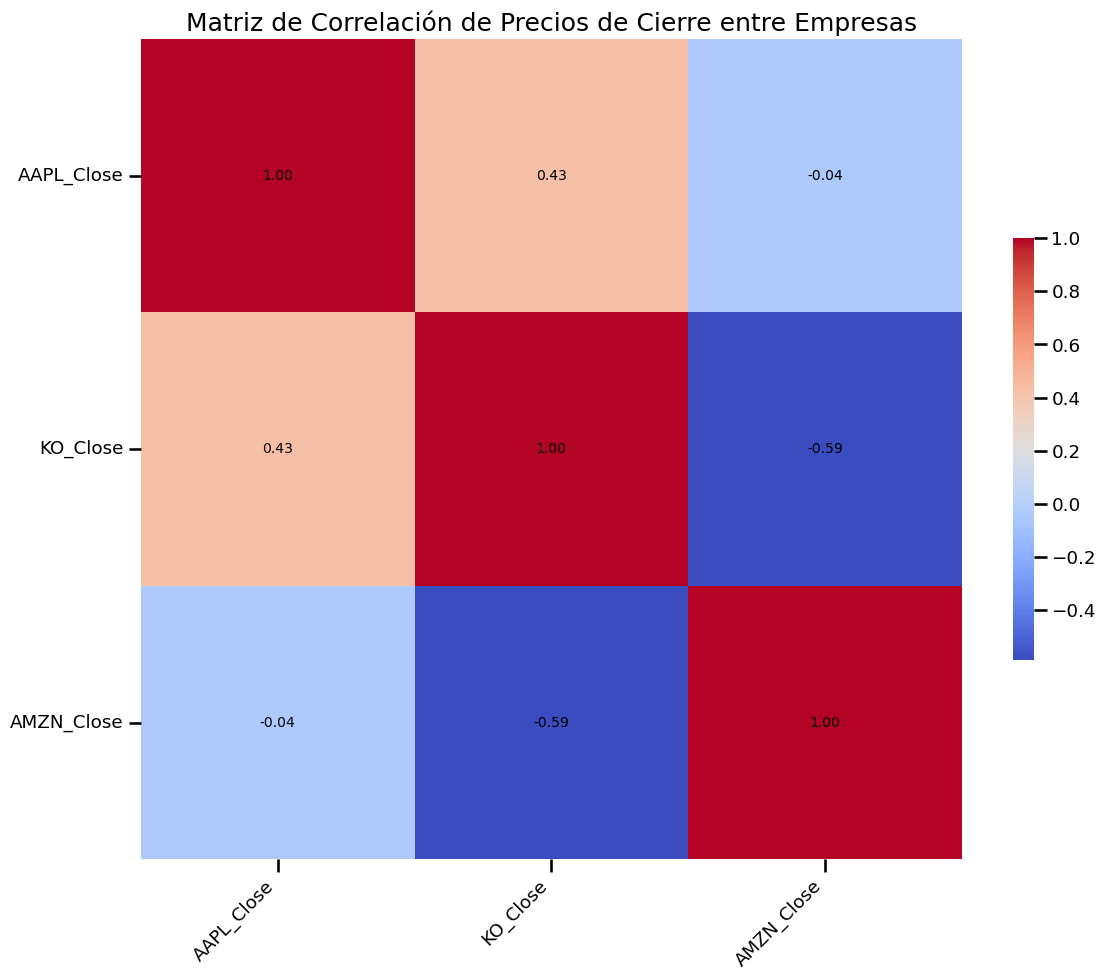

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame para almacenar los precios de cierre de cada empresa
close_prices = pd.DataFrame()

# Extraer y almacenar los precios de cierre de cada empresa en el nuevo DataFrame
for ticker, data in historical_data_dict.items():
    close_prices[ticker + '_Close'] = data['Close']

# Calcular la matriz de correlación para los precios de cierre
correlation_matrix_close = close_prices.corr()

# Crear el mapa de calor sin los valores numéricos
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlation_matrix_close, cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Agregar los valores numéricos manualmente
for i in range(len(correlation_matrix_close)):
    for j in range(len(correlation_matrix_close)):
        ax.text(j + 0.5, i + 0.5, f"{correlation_matrix_close.iloc[i, j]:.2f}",
                ha='center', va='center', fontsize=10, color='black')

# Ajustar la visualización de las etiquetas y el título
plt.title('Matriz de Correlación de Precios de Cierre entre Empresas', size=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar la disposición para que todo encaje sin solaparse y sea claramente visible
plt.tight_layout()
plt.show()


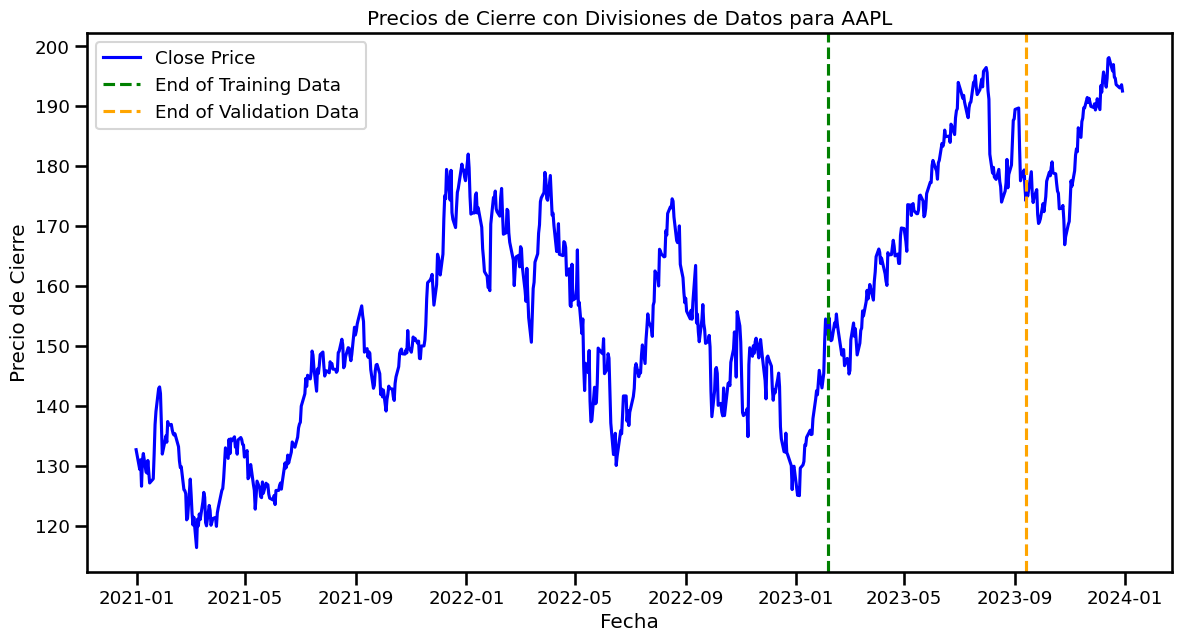

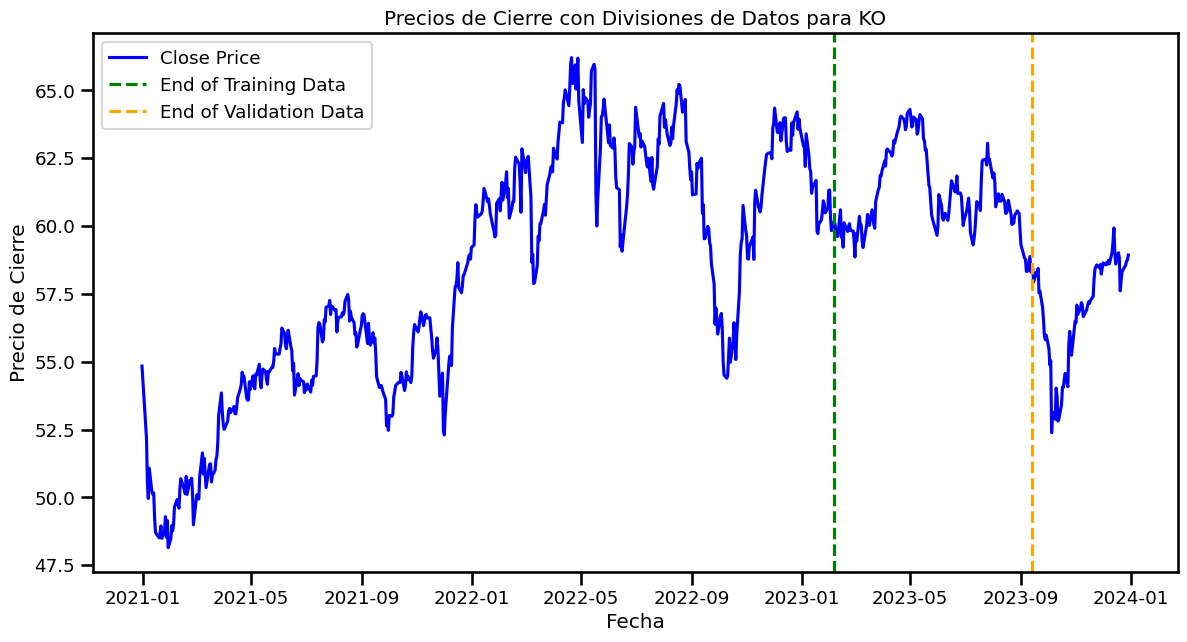

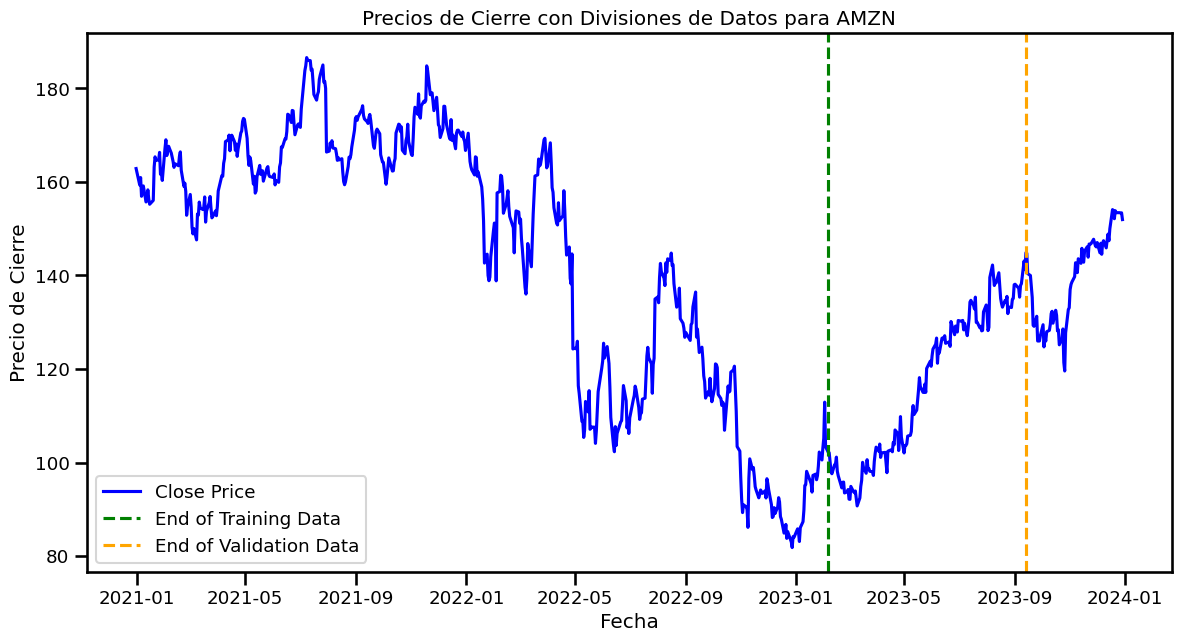

In [22]:
import matplotlib.pyplot as plt

def plot_with_splits(data, ticker, train_idx, val_idx, test_idx):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.axvline(data.index[train_idx], color='green', linestyle='--', label='End of Training Data')
    plt.axvline(data.index[val_idx], color='orange', linestyle='--', label='End of Validation Data')

    plt.title(f'Precios de Cierre con Divisiones de Datos para {ticker}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    plt.show()

# Dividir los datos y graficar para cada empresa
for ticker, data in historical_data_dict.items():
    total_len = len(data)
    train_idx = int(total_len * 0.7)
    val_idx = int(total_len * 0.9)  # 70% + 20%

    plot_with_splits(data, ticker, train_idx, val_idx, total_len)
